<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/SpamDetection_CountVectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [6]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [7]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
import pandas as pd

# Try reading with different encodings
try:
    dataset = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dataset = pd.read_csv('spam.csv', encoding='latin1')
    except UnicodeDecodeError:
        dataset = pd.read_csv('spam.csv', encoding='utf-16')

# Once you've successfully read the file, you can continue with your analysis or processing


In [13]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
dataset=dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [15]:
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
X=dataset.iloc[:,1]

In [17]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [18]:
y=dataset['v1']

In [19]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [20]:
X_input_train,X_input_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
len(X_input_train)

4457

In [22]:
len(y_train)

4457

In [23]:
vectorizer=CountVectorizer()

In [24]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model=MultinomialNB()

In [28]:
model.fit(X_train,y_train)

MultinomialNB()

In [48]:
model1_test=model.score(X_test,y_test)

In [49]:
model1_train=model.score(X_train,y_train)

In [53]:
model_result=(['model1',model1_test,model1_train])

In [54]:
model_result

['model1', 0.9811659192825112, 0.9932690150325331]

In [31]:
y_pred=model.predict(X_test)

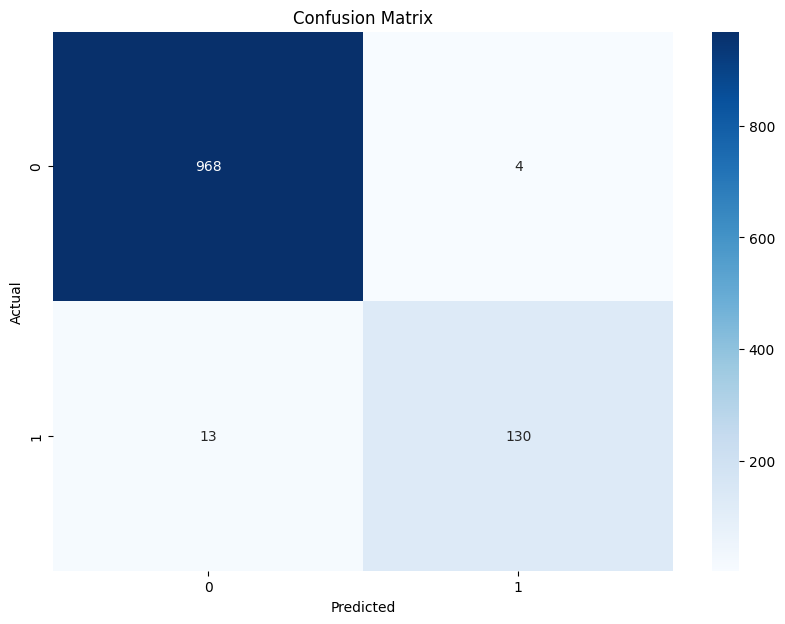

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       972
        spam       0.97      0.91      0.94       143

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



lemminization

In [34]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [35]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [36]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

In [37]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
model= MultinomialNB()

In [40]:
model.fit(X_train,y_train)

MultinomialNB()

In [50]:
model2_test=model.score(X_test,y_test)

In [51]:
model2_train=model.score(X_train,y_train)

In [43]:
y_pred1=model.predict(X_test)

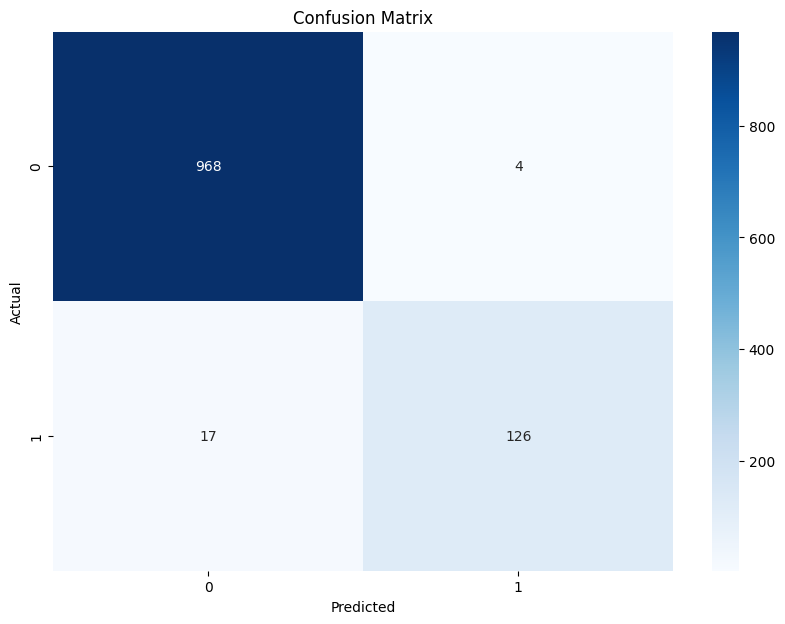

In [44]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred1)
print(report)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       972
        spam       0.97      0.88      0.92       143

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
model_result=(['model1',model1_test,model1_train],
              ['model2',model2_test,model2_train])

In [56]:
model_result

(['model1', 0.9811659192825112, 0.9932690150325331],
 ['model2', 0.9811659192825112, 0.9932690150325331])

Porter Stemmer

In [57]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [58]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())

In [59]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [60]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [61]:
model.fit(X_train,y_train)

MultinomialNB()

In [62]:
model3_test=model.score(X_test,y_test)

In [63]:
model3_train=model.score(X_train,y_train)

In [64]:
model_result=(['model1',model1_test,model1_train],
              ['model2',model2_test,model2_train],
              ['model3',model3_test,model3_train])

In [65]:
model_result

(['model1', 0.9811659192825112, 0.9932690150325331],
 ['model2', 0.9811659192825112, 0.9932690150325331],
 ['model3', 0.9811659192825112, 0.9934933811981154])

In [66]:
y_pred2=model.predict(X_test)

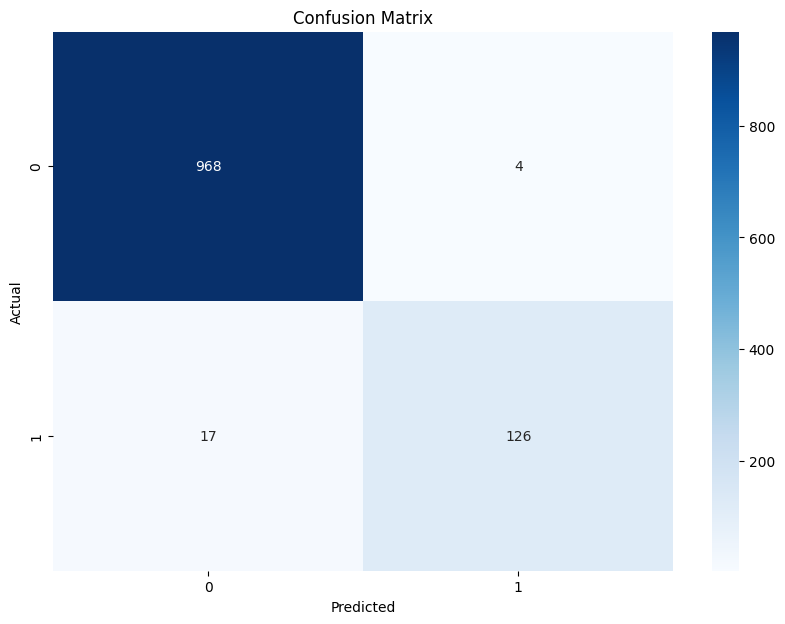

In [68]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred2)
print(report)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       972
        spam       0.97      0.88      0.92       143

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

